# 8. 컨볼루션 신경망

## 컨볼루션층과 풀링층

### 컨볼루션층 (convolution layer)

- 입력 특징 맵에 컨볼루션을 적용해서 얻은 특징 맵을 출력
- 이때 입력 특징 맵은 k개 채널로 구성되어 있어, 깊이가 k인 m x n 맵. 즉 m x n x k 모양의 3차원 텐서
- 필터의 깊이는 입력 특징 맵과 같이 k고 크기는 h x h. h는 보통 3 or 5 사용

### 풀링층 (polling layer)

- 보통 컨볼루션층 뒤에 풀링층이 따름
- 최대 풀링, 평균 풀링 두가지를 사용 보통 최대 풀링 사용

### Max Pooling

- 필터 안의 화소 중에서 최댓값을 취하는 연산

### Average Pooling

- 필터 안에 있는 화솟값의 평균을 취함

## 8-1. LeNet-5로 MNIST 인식하기

In [1]:
import numpy as np
import tensorflow as tf
import tensorflow.keras.datasets as ds

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dropout, Dense
from tensorflow.keras.optimizers import Adam

(x_train, y_train), (x_test, y_test) = ds.mnist.load_data()
x_train = x_train.reshape(60000, 28, 28, 1)
x_test = x_test.reshape(10000, 28, 28, 1)
x_train = x_train.astype(np.float32)/255.0
x_test = x_test.astype(np.float32)/255.0
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

cnn = Sequential()
cnn.add(Conv2D(6,(5,5),padding = 'same', activation = 'relu', input_shape=(28,28,1)))
cnn.add(MaxPooling2D(pool_size=(2,2),strides=2))
cnn.add(Conv2D(16,(5,5),padding='valid',activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2,2),strides=2))
cnn.add(Conv2D(120,(5,5),padding='valid',activation='relu'))
cnn.add(Flatten())
cnn.add(Dense(units=84,activation='relu'))
cnn.add(Dense(units=10,activation='softmax'))

cnn.compile(loss='categorical_crossentropy', optimizer = Adam(learning_rate=0.001),metrics=['accuracy'])
cnn.fit(x_train, y_train, batch_size=128,epochs=30,validation_data=(x_test,y_test),verbose=2)

res = cnn.evaluate(x_test, y_test, verbose = 0)
print("정확률=", res[1]*100)

Epoch 1/30
469/469 - 9s - loss: 0.3160 - accuracy: 0.9050 - val_loss: 0.0842 - val_accuracy: 0.9745 - 9s/epoch - 18ms/step
Epoch 2/30
469/469 - 8s - loss: 0.0837 - accuracy: 0.9737 - val_loss: 0.0628 - val_accuracy: 0.9800 - 8s/epoch - 16ms/step
Epoch 3/30
469/469 - 8s - loss: 0.0600 - accuracy: 0.9808 - val_loss: 0.0493 - val_accuracy: 0.9853 - 8s/epoch - 16ms/step
Epoch 4/30
469/469 - 8s - loss: 0.0485 - accuracy: 0.9848 - val_loss: 0.0425 - val_accuracy: 0.9860 - 8s/epoch - 16ms/step
Epoch 5/30
469/469 - 8s - loss: 0.0386 - accuracy: 0.9879 - val_loss: 0.0463 - val_accuracy: 0.9843 - 8s/epoch - 16ms/step
Epoch 6/30
469/469 - 8s - loss: 0.0326 - accuracy: 0.9895 - val_loss: 0.0404 - val_accuracy: 0.9862 - 8s/epoch - 16ms/step
Epoch 7/30
469/469 - 8s - loss: 0.0290 - accuracy: 0.9904 - val_loss: 0.0291 - val_accuracy: 0.9915 - 8s/epoch - 16ms/step
Epoch 8/30
469/469 - 8s - loss: 0.0227 - accuracy: 0.9929 - val_loss: 0.0263 - val_accuracy: 0.9920 - 8s/epoch - 16ms/step
Epoch 9/30
469/4

## 코드 설명 및 정리

## 순서 

## 1. 데이터 준비
## 2. 모델 선택
## 3. 학습
## 4. 예측

## 1. 데이터 준비

- 앞서 한 것과 동일

## 2. 모델 선택 (신경망 구조 설계) (CNN)

### Sequential 함수로 cnn 객체 생성
```
cnn=Sequential()
```

### add함수와 Conv2D 함수로 cnn 객체에 컨볼루션층 추가

### 첫 번째 컨볼루션층
```
cnn.add(Conv2D(6,(5,5),padding='same',activation='relu',input_shape=(28,28,1)))
```

- 첫 번째와 두 번째 인수인 6,(5,5)는  5 x 5 필터를 6개 사용
- 세 번째 인수인 padding = 'same'은 0 패딩을 적용
- 네번째 인수인 activation = 'relu'는 ReLU 활성 함수 사용
- 마지막 인수인 input_shape=()는 신경망에 최초로 입력되는 텐서 모양 지정

### 첫 번째 MaxPooling2D
```
cnn.add(MaxPooling2D(pool_size=(2,2),strides=2))
```

- 최대 풀링을 적용하며 (2,2) 필터에 보폭은 2로 적용

### 두 번째 컨볼루션층 
```
cnn.add(Conv2D(16,(5,5),padding='valid',activation='relu'))
```

- 첫 번째와 두 번째 인수인 16,(5,5)는  5 x 5 필터를 16개 사용
- 세 번째 인수인 padding = 'valid'은 덧대기 적용 x
- 네번째 인수인 activation = 'relu'는 ReLU 활성 함수 사용
- 첫 번째 층에서 이미 input_shape=()을 입력했으므로 텐서플로가 앞층에서 흘러오는 텐서 모양을 앎 재입력할 필요 x

### 두 번째 MaxPooling2D
```
cnn.add(MaxPooling2D(pool_size=(2,2),strides=2))
```

- 첫 번째 최대 풀링과 동일

### 세 번째 컨볼루션층 
```
cnn.add(Conv2D(16,(5,5),padding='valid',activation='relu'))
```

- 첫 번째와 두 번째 인수인 120,(5,5)는  5 x 5 필터를 120개 사용
- 나머지는 두 번째 컨볼루션 층과 동일


### Flatten 연산
```
cnn.add(Flatten())
```

- 텐서를 1차원 구조로 변환하여 완전연결층에 입력
- 그 후 cnn.add(Dense())를 사용해 완전연결층을 추가


```
cnn.add(Dense(units=84,activation='relu'))
cnn.add(Dense(units=10,activation='softmax')) // 출력층
```

- 마지막 출력층에선 출력노드는 10개, 활성 함수로 softmax를 사용


## 3. 학습

- Adam 옵티마이저와 교차 엔트로피 손실 함수 사요ㅕㅇ
- 미니 배치 크기를 128, 최대 30세대 반복하며 매 세대마다 validation 인수에 설정한 x_test와 y_test를 가지고 성능 평가 진행

## 4. 예측

### evaluate 함수
```
res=cnn.evaluate(x_test,y_test,verbose=0) 
print('정확률=',res[1]*100)
```

- x_test와 y_test를 테스트 집합으로 성능을 측정하여 res 저장
- res * 100을 하여 퍼센트로 환산하여 출력

## 8-2. 컨볼루션 신경망으로 자연 영상 인식하기

Epoch 1/100
391/391 - 37s - loss: 1.6514 - accuracy: 0.3934 - val_loss: 1.2925 - val_accuracy: 0.5430 - 37s/epoch - 94ms/step
Epoch 2/100
391/391 - 36s - loss: 1.2568 - accuracy: 0.5494 - val_loss: 1.0703 - val_accuracy: 0.6217 - 36s/epoch - 92ms/step
Epoch 3/100
391/391 - 36s - loss: 1.0876 - accuracy: 0.6130 - val_loss: 0.9591 - val_accuracy: 0.6648 - 36s/epoch - 91ms/step
Epoch 4/100
391/391 - 37s - loss: 0.9859 - accuracy: 0.6515 - val_loss: 0.8928 - val_accuracy: 0.6848 - 37s/epoch - 94ms/step
Epoch 5/100
391/391 - 37s - loss: 0.9084 - accuracy: 0.6777 - val_loss: 0.8246 - val_accuracy: 0.7111 - 37s/epoch - 95ms/step
Epoch 6/100
391/391 - 37s - loss: 0.8527 - accuracy: 0.6995 - val_loss: 0.7915 - val_accuracy: 0.7236 - 37s/epoch - 94ms/step
Epoch 7/100
391/391 - 37s - loss: 0.7993 - accuracy: 0.7180 - val_loss: 0.7544 - val_accuracy: 0.7375 - 37s/epoch - 94ms/step
Epoch 8/100
391/391 - 37s - loss: 0.7581 - accuracy: 0.7320 - val_loss: 0.7105 - val_accuracy: 0.7553 - 37s/epoch - 95

Epoch 66/100
391/391 - 35s - loss: 0.2998 - accuracy: 0.8939 - val_loss: 0.6834 - val_accuracy: 0.7924 - 35s/epoch - 89ms/step
Epoch 67/100
391/391 - 35s - loss: 0.2928 - accuracy: 0.8953 - val_loss: 0.6769 - val_accuracy: 0.8001 - 35s/epoch - 89ms/step
Epoch 68/100
391/391 - 35s - loss: 0.2952 - accuracy: 0.8951 - val_loss: 0.6622 - val_accuracy: 0.8025 - 35s/epoch - 89ms/step
Epoch 69/100
391/391 - 35s - loss: 0.2882 - accuracy: 0.8977 - val_loss: 0.6690 - val_accuracy: 0.7986 - 35s/epoch - 90ms/step
Epoch 70/100
391/391 - 35s - loss: 0.2959 - accuracy: 0.8948 - val_loss: 0.6709 - val_accuracy: 0.8036 - 35s/epoch - 89ms/step
Epoch 71/100
391/391 - 35s - loss: 0.2947 - accuracy: 0.8969 - val_loss: 0.6418 - val_accuracy: 0.8007 - 35s/epoch - 90ms/step
Epoch 72/100
391/391 - 35s - loss: 0.2956 - accuracy: 0.8970 - val_loss: 0.6576 - val_accuracy: 0.8014 - 35s/epoch - 89ms/step
Epoch 73/100
391/391 - 35s - loss: 0.2854 - accuracy: 0.8990 - val_loss: 0.6724 - val_accuracy: 0.8027 - 35s/ep

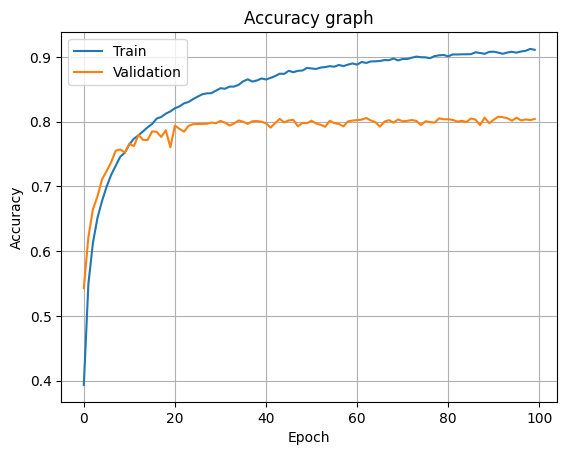

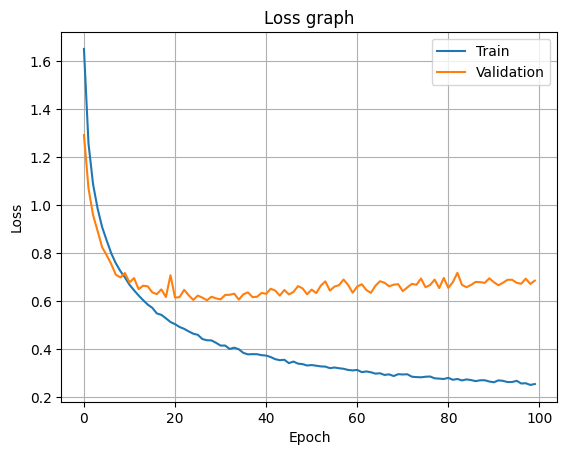

In [1]:
import numpy as np
import tensorflow as tf
import tensorflow.keras.datasets as ds

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout
from tensorflow.keras.optimizers import Adam

(x_train,y_train),(x_test,y_test)=ds.cifar10.load_data()
x_train=x_train.astype(np.float32)/255.0
x_test=x_test.astype(np.float32)/255.0
y_train=tf.keras.utils.to_categorical(y_train,10)
y_test=tf.keras.utils.to_categorical(y_test,10)

cnn=Sequential()
cnn.add(Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3)))
cnn.add(Conv2D(32,(3,3),activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Dropout(0.25))
cnn.add(Conv2D(64,(3,3),activation='relu'))
cnn.add(Conv2D(64,(3,3),activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Dropout(0.25))
cnn.add(Flatten())
cnn.add(Dense(units=512,activation='relu'))
cnn.add(Dropout(0.5))
cnn.add(Dense(units=10,activation='softmax'))

cnn.compile(loss='categorical_crossentropy',optimizer=Adam(learning_rate=0.001),metrics=['accuracy'])
hist=cnn.fit(x_train,y_train,batch_size=128,epochs=100,validation_data=(x_test,y_test),verbose=2)

res=cnn.evaluate(x_test,y_test,verbose=0)
print('정확률=',res[1]*100)

import matplotlib.pyplot as plt

plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Accuracy graph')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'])
plt.grid()
plt.show()

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss graph')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'])
plt.grid()
plt.show()

## 8-3. 우편번호 인식기 v.2
## 필기 숫자 인식기 성능 향상하기

In [ ]:
import numpy as np
import tensorflow as tf
import tensorflow.keras.datasets as ds

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dropout, Dense
from tensorflow.keras.optimizers import Adam

(x_train, y_train),(x_test, y_test) = ds.mnist.load_data()
x_train = x_train.reshape(60000, 28, 28, 1)
x_test = x_test.reshape(10000, 28, 28, 1)
x_train = x_train.astype(np.float32) / 255.0
x_test = x_test.astype(np.float32) / 255.0
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

cnn = Sequential()
cnn.add(Conv2D(32,(3, 3),activation='relu',input_shape=(28, 28, 1)))
cnn.add(Conv2D(32,(3, 3), activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Dropout(0.25))
cnn.add(Conv2D(64,(3, 3),activation='relu',input_shape=(28, 28, 1)))
cnn.add(Conv2D(64,(3, 3), activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Dropout(0.25))
cnn.add(Flatten())
cnn.add(Dense(units=512, activation='relu'))
cnn.add(Dropout(0.5))
cnn.add(Dense(units=10, activation='softmax'))

cnn.compile(loss='categorical_crossentropy', optimizer = Adam(learning_rate=0.001),metrics=['accuracy'])
cnn.fit(x_train, y_train, batch_size = 128, epochs = 100, validation_data = (x_test, y_test), verbose = 2)

cnn.save('cnn_v2.h5')

res = cnn.evaluate(x_test, y_test, verbose = 0)
print("정확률 = ", res[1] * 100)

## 딥러닝의 학습 알고리즘 향상 (간단한 용어 정리)

## 손실 함수

- 초기 신경망에선 MSE를 사용했고, 딥러닝에서는 이후에 개발된 교차 엔트로피를 주로 사용

### 교차 엔트로피 손실 함수

- 두 확률 분포가 얼마나 다른지 측정
- 신경망의 경우 신경망이 예측한 벡터와 참 값 벡터를 확률 분포로 간주하고 둘의 다른 정도를 측정

### 평균제곱오차 vs 교차 엔트로피 손실 함수

- 평균제곱오차는 손실 함수의 값이 더 큰데 미분값이 더 작아 가중치 갱신이 더 작은 불공정한 상황이 발생하는 경우가 있음
- 교차 엔트로피 손실 함수는 이러한 불공정성 문제를 해결

### Focal 손실 함수

- 부류 불균형이 심한 경우에 주로 사용
- 물체 검출 또는 영역 분할을 할때 유용하게 사용 가능
- gamma라는 하이퍼 매개변수를 사용하는데 gamma 값이 클수록 곡선이 0에 더욱 빠르게 가까워진다.
- gamma = 0은 교차 엔트로피와 동일
- gamma = 2일 때 최고 성능을 보임

## 옵티마이저

- 신경망 학습은 손실 함수의 최저점, 즉 오류가 최저인 점을 찾아가는 과정
- 이 최적화를 푸는 표준 알고리즘이 스토캐스틱 경사하강법(SGD 옵티마이저)임

### 모멘텀

- 물리학에서 모멘텀은 이전 운동량을 현재에 반영할 때 사용
- 모멘텀을 신경망 학습 알고리즘에 적용하면 성능 향상이 뚜렷이 나타남
- 모멘텀의 값을 0.1, 0.2, ~~~ , 0.9로 바꾸면서 성능을 측정해 볼 수 있음 

### 적응적 학습률

- 최소점으로 도달하기위해 얼만큼 이동해야하는지에 대한 정보는 없기 때문에 0.01 또는 0.001과 같이 작은 학습률을 곱해 조금씩 보수적으로 이동
- 적응적 학습률을 적용한 대표적인 옵티마이저의 종류에는 AdaGrad, RMSprop, Adam 등이 있음

- AdaGrad : 이전 그레이디언트를 누적한 정보를 이용해 학습률을 적응적으로 결정
- RMSprop : 이전 그레이디언트를 누적할 때 오래될수록 영향력을 줄여가는 정책으로 AdaGrad를 개선
- Adam : RMSprop에 모멘텀을 적용

## 규제

- 딥러닝은 신경망 모델의 용량을 크게 유지하면서 여러 규제 기법을 적용해 과잉 적합을 방지하는 전략 사용

### 과소 적합

- 데이터에 비해 용량이 너무 작아 모델링이 제대로 되지 않는 상태

### 과잉 적합

- 학습 알고리즘이 훈련 집합에 과다하게 맞추다 보니 일반화 능력을 상실하는 현상
- 즉 일반화 능력이 낮은 상태를 의미

### 과잉 적합을 방지할 수 있는 방법인 데이터 증강

### 데이터 증강

- 딥러닝에서는 주어진 훈련 집합을 조금씩 변형하여 인위적으로 늘리는 데이터 증강 방법을 주로 사용
- 대표적으로 오프라인 증강 방식과 온라인 증강 방식 이 두 가지가 있는데 주로 온라인 방식을 사용

#### 오프라인 증강 방식 

- 데이터를 한꺼번에 증강하여 폴더에 저장한 다음 미니 배치 단위로 읽어 학습하는 방식

#### 온라인 증강 방식 

- 필요할 때마다 새로운 미니 배치를 랜덤증강으로 생성하는 방식

### 드랍 아웃

- 특징 맵을 구성하는 요소 중 일부를 랜덤으로 선택하여 0으로 설정
- 보통 학습할 때만 적용하고 예측할 때는 적용하지 않음

### 조기 멈춤

- 과잉 적합이 일어난다고 판단되는 시기에 조기에 멈춤으로써 효율성을 챙기는 방식

- patience는 그 값에 해당하는 세대 동안 개선이 없으면 지정한 세대에 도달하지 않았더라도 조기에 학습을 멈추라는 지시
- restore_best_weights = False면 멈추는 순간의 가중치를 취함
- restore_best_weights = True면 가장 좋았떤 세대의 가중치를 취함

## 8-5 데이터 증강된 영상 확인하기

C:\Users\PC\AppData\Local\Temp\ipykernel_5836\3505912060.py:16: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.title(class_names[int(y_train[i])])


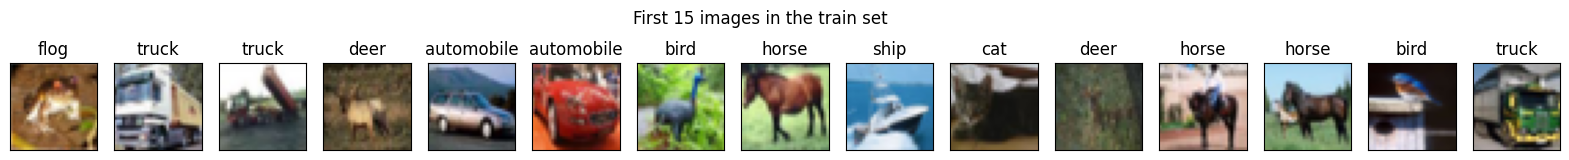

C:\Users\PC\AppData\Local\Temp\ipykernel_5836\3505912060.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.title(class_names[int(label[i])])


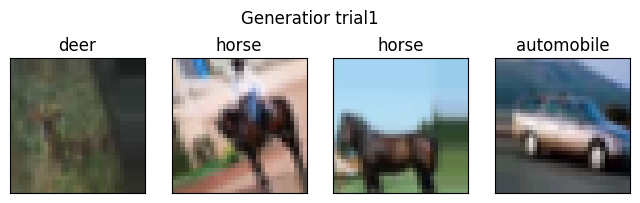

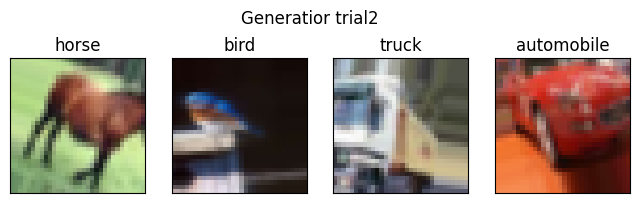

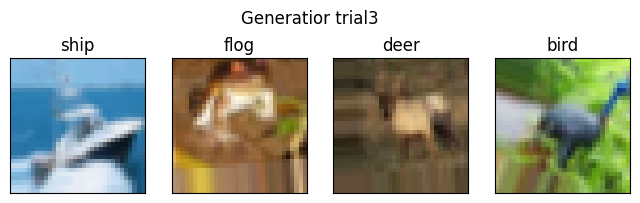

In [7]:
import tensorflow.keras.datasets as ds
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

(x_train, y_train),(x_test, y_test) = ds.cifar10.load_data()
x_train = x_train.astype('float32'); x_train /= 255
x_train = x_train[0:15,]; y_train = y_train[0:15,] # 앞 15개에 대해서만 증대 적용
class_names=['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'flog', 'horse', 'ship', 'truck']

plt.figure(figsize = (20,2))
plt.suptitle("First 15 images in the train set")
for i in range(15):
    plt.subplot(1,15,i+1)
    plt.imshow(x_train[i])
    plt.xticks([]); plt.yticks([])
    plt.title(class_names[int(y_train[i])])
plt.show()

batch_siz = 4 # 한번에 생성하는 양(미니 배치)
generator = ImageDataGenerator(rotation_range = 20.0, width_shift_range = 0.2, height_shift_range = 0.2, horizontal_flip = True)
gen = generator.flow(x_train, y_train, batch_size = batch_siz)

for a in range(3):
    img, label = gen.next()
    plt.figure(figsize = (8, 2.4))
    plt.suptitle("Generatior trial" + str(a+1))
    for i in range(batch_siz):
        plt.subplot(1, batch_siz, i+1)
        plt.imshow(img[i])
        plt.xticks([]); plt.yticks([])
        plt.title(class_names[int(label[i])])
    plt.show()

## 코드 설명 및 정리

## 텐서플로 모듈 불러오기

## ImageDataGenerator 클래스
```
from tensorflow.keras.preprocessing.image import ImageDataGenerator
```

## 데이터 증대

### 1.사용 데이터 제한
```
x_train = x_train[0:15,]; y_train = y_train[0:15,]
```

- 50000개의 영상 중에서 데이터 증대를 원활하게 확인하기 위해서 데이터를 15개로 임의로 제한

### 2.generator 객체 생성
```
batch_siz = 4 # 한번에 생성하는 양(미니 배치)
generator = ImageDataGenerator(rotation_range = 20.0, width_shift_range = 0.2, height_shift_range = 0.2, horizontal_flip = True)
```

- 데이터 증대를 확인만 하면 되니까 미니배치 크기 작게 4로 설정 
- 회전 : -20 ~ 20도
- 가로 방향 이동 : 20% 이내
- 세로 방향 이동 : 20% 이내
- 좌우 반전 시도

```
gen = generator.flow(x_train, y_train, batch_size = batch_siz)
```

- 데이터 증강 지시 및 미니 배치 크기 설정

### 3.데이터 증강
```
for a in range(3):
~~~~~
plt.show()
```

- 총 3번에 걸쳐서 데이터를 증강
- 4장씩 표시

# 신경망 간단하게 알아보기

## (VGGNet, GoogLeNet, ResNet)

### VGGNet

- 3 x 3의 작은 마스크를 사용하고 층의 깊이를 16으로 깊게 만듦

### GoogLeNet

- 컨볼루션층 안에 다층 퍼셉트론을 둔 네트워크 속의 네트워크라는 아이디어 적용

### ResNet

- 이전 층의 특징 맵을 현재 층의 결과에 더하는 지름길 연결이라는 아이디어 적용

## 8-6 ResNet50 으로 자연 영상 인식하기

In [1]:
import cv2 as cv 
import numpy as np
from tensorflow.keras.applications.resnet50 import ResNet50,preprocess_input,decode_predictions

model=ResNet50(weights='imagenet')

img=cv.imread('./Data/rabbit.jpg') 
x=np.reshape(cv.resize(img,(224,224)),(1,224,224,3))   
x=preprocess_input(x)

preds=model.predict(x)
top5=decode_predictions(preds,top=5)[0]
print('예측 결과:',top5)

for i in range(5):
    cv.putText(img,top5[i][1]+':'+str(top5[i][2]),(10,20+i*20),cv.FONT_HERSHEY_SIMPLEX,0.5,(255,255,255),1)

cv.imshow('Recognition result',img)

cv.waitKey()
cv.destroyAllWindows()

1/1 [==============================] - 1s 899ms/step
예측 결과: [('n02325366', 'wood_rabbit', 0.7427537), ('n02326432', 'hare', 0.24023679), ('n02328150', 'Angora', 0.008815734), ('n01877812', 'wallaby', 0.002689247), ('n02356798', 'fox_squirrel', 0.0012279302)]


## ResNet50 

## 8-7 DenseNet121로 견종 인식하기

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten,Dense,Dropout,Rescaling
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications.densenet import DenseNet121
from tensorflow.keras.utils import image_dataset_from_directory
import pathlib

data_path=pathlib.Path('./Data/stanford_dogs/images/images')

train_ds=image_dataset_from_directory(data_path,validation_split=0.2,subset='training',seed=123,image_size=(224,224),batch_size=16)
test_ds=image_dataset_from_directory(data_path,validation_split=0.2,subset='validation',seed=123,image_size=(224,224),batch_size=16)

base_model=DenseNet121(weights='imagenet',include_top=False,input_shape=(224,224,3))
cnn=Sequential()
cnn.add(Rescaling(1.0/255.0))
cnn.add(base_model)
cnn.add(Flatten())
cnn.add(Dense(1024,activation='relu'))
cnn.add(Dropout(0.75))
cnn.add(Dense(units=120,activation='softmax'))

cnn.compile(loss='sparse_categorical_crossentropy',optimizer=Adam(learning_rate=0.001),metrics=['accuracy'])
hist=cnn.fit(train_ds,epochs=200,validation_data=test_ds,verbose=2)

print('정확률=',cnn.evaluate(test_ds,verbose=0)[1]*100)

cnn.save('cnn_for_stanford_dogs.h5')	# 미세 조정된 모델을 파일에 저장

import pickle
f=open('dog_species_names.txt','wb')
pickle.dump(train_ds.class_names,f)
f.close()

import matplotlib.pyplot as plt

plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Accuracy graph')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'])
plt.grid()
plt.show()

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss graph')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'])
plt.grid()
plt.show()

Found 20580 files belonging to 120 classes.
Using 16464 files for training.
Found 20580 files belonging to 120 classes.
Using 4116 files for validation.
Epoch 1/200
1029/1029 - 3403s - loss: 5.9363 - accuracy: 0.0121 - val_loss: 4.7847 - val_accuracy: 0.0102 - 3403s/epoch - 3s/step
Epoch 2/200
1029/1029 - 3393s - loss: 4.7826 - accuracy: 0.0123 - val_loss: 4.7836 - val_accuracy: 0.0102 - 3393s/epoch - 3s/step
Epoch 3/200
1029/1029 - 3354s - loss: 4.7920 - accuracy: 0.0127 - val_loss: 5.0961 - val_accuracy: 0.0102 - 3354s/epoch - 3s/step
Epoch 4/200
1029/1029 - 3425s - loss: 4.7801 - accuracy: 0.0128 - val_loss: 4.7834 - val_accuracy: 0.0100 - 3425s/epoch - 3s/step
Epoch 5/200
1029/1029 - 3426s - loss: 4.7797 - accuracy: 0.0128 - val_loss: 4.7836 - val_accuracy: 0.0100 - 3426s/epoch - 3s/step
Epoch 6/200
1029/1029 - 3412s - loss: 4.7796 - accuracy: 0.0128 - val_loss: 4.7838 - val_accuracy: 0.0100 - 3412s/epoch - 3s/step
Epoch 7/200
1029/1029 - 3400s - loss: 4.7795 - accuracy: 0.0128 - v

## 8-8 견종 인식 프로그램 구현하기

In [ ]:
import cv2 as cv
import numpy as np
import tensorflow as tf
import winsound
import pickle
import sys
from PyQt5.QtWidegets import *

cnn = tf.keras.models.load_model('cnn_for_stanford_dogs.h5')   # 모델 읽기
dog_species = pickle.load(open('dog_species_names.txt', 'rb')) # 견종 이름

class DogSpeciesRecognition(QMainWindow):
    def __init__(self):
        super().__init__()
        self.setWindowTitle('견종 인식')
        self.setGeometry(200, 200, 700, 100)
        
        fileButton = QPushButton('강아지 사진 열기', self)
        recognitionButton = QPushButton('품종 인식', self)
        quitButton = QPushButton('나가기', self)

        fileButton = setGeometry(10,10,100,30)
        recognitionButton = setGeometry(110,10,100,30)
        quitButton = setGeometry(510,10,100,30)

        fileButton.clicked.connect(self.pictureOpenFunction)
        recognitionButton.clicked.connect(self.recognitionFunction)
        quitButton.clicked.connect(self.quitFunction)
        
def pictureOpenFunction(self):
    fname = QFileDialog.getOpenFileName(self, '강아지 사진 읽기', './')
    self.img = cv.imread(fname[0])
    if self.img is None: 
        sys.exit('파일을 찾을 수 없습니다.')
        
    cv.imshow('Dog image', self.img)
    
def recognitionFunction(self):
    x=np.reshape(cv.resize(self.img,(244,244)), (1,244,244,3))
    res=cnn.predict(x)[0]
    top5=np.argsort(-res)[:5]
    top5_dog_species_names = [dog_species[i] for i in top5]
    for i in range(5):
        prob = '('+str(res[top5[i]])+')'
        name=str(top5_dog_species_names[i]).split('-')[1]
        cv.putText(self.img, prob+name, (10, 100+i*30), cv.FONT_HERSHEY_SIMPLEX, 0.7, (255,255,255),2)
        cv.imshow('Dog image', self.img)
        winsound.Beep(1000,500)
        
    def quitFunction(self):
        cv.destroyAllWindows()
        self.close()
        
app=QApplication(sys.argv)
win=DogSpeiciesRecognition()
win.show()
app.exec_()